<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/aenc_faces_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import glob
from PIL import Image
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
cd /content/gdrive/My\ Drive


/content/gdrive/My Drive


In [0]:
import h5py


In [0]:
cd MLTSA2020/

/content/gdrive/My Drive/MLTSA2020


# faces

In [0]:
!wget https://cswww.essex.ac.uk/mv/allfaces/faces95.zip

In [0]:
!unzip faces95.zip

In [0]:
!ls faces95/*/*jpg

faces95/adhast/adhast.10.jpg  faces95/llambr/llambr.10.jpg
faces95/adhast/adhast.11.jpg  faces95/llambr/llambr.11.jpg
faces95/adhast/adhast.12.jpg  faces95/llambr/llambr.12.jpg
faces95/adhast/adhast.13.jpg  faces95/llambr/llambr.13.jpg
faces95/adhast/adhast.14.jpg  faces95/llambr/llambr.14.jpg
faces95/adhast/adhast.15.jpg  faces95/llambr/llambr.15.jpg
faces95/adhast/adhast.16.jpg  faces95/llambr/llambr.16.jpg
faces95/adhast/adhast.17.jpg  faces95/llambr/llambr.17.jpg
faces95/adhast/adhast.18.jpg  faces95/llambr/llambr.18.jpg
faces95/adhast/adhast.19.jpg  faces95/llambr/llambr.19.jpg
faces95/adhast/adhast.1.jpg   faces95/llambr/llambr.1.jpg
faces95/adhast/adhast.20.jpg  faces95/llambr/llambr.20.jpg
faces95/adhast/adhast.2.jpg   faces95/llambr/llambr.2.jpg
faces95/adhast/adhast.3.jpg   faces95/llambr/llambr.3.jpg
faces95/adhast/adhast.4.jpg   faces95/llambr/llambr.4.jpg
faces95/adhast/adhast.5.jpg   faces95/llambr/llambr.5.jpg
faces95/adhast/adhast.6.jpg   faces95/llambr/llambr.6.jpg
fac

In [0]:
flist = glob.glob("faces95/*/*jpg")

In [0]:
N = len(flist)
N

1440


# read in data

In [0]:
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


((70, 70, 1), 540)

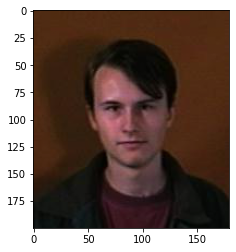

In [0]:
im = Image.open(flist[0])
np_im = numpy.array(im)[:,:,:3].astype(float) / 255 - .5
pl.imshow(np_im + .5)
np_im[25:165:2,25:165:2,:1].shape, np.prod(np_im.shape[1:])

In [0]:
#skip and read the saved version
imgs = np.zeros((N, 70, 70, 1))
for i,f in enumerate(flist):
  if not i%50: print(i)
  im = Image.open(flist[i])
  np_im = numpy.array(im)[:,:,:3].astype(float) / 255 
  imgs[i] = numpy.array(im)[25:165:2,25:165:2,:1].astype(float) / 255 

0
50
100
150
200
250
300
350
400


In [0]:
#down sample
imgs_orig = imgs.copy()

In [0]:
imgs = imgs[:,::2,::2]
imgs[0].shape

(35, 35, 1)

In [0]:
imgs.shape

(1440, 35, 35, 1)

In [0]:
np.prod(imgs[0].shape)

1225

In [0]:
from sklearn.model_selection import train_test_split
X_tr,  X_te, y_tr, y_te = train_test_split(imgs, imgs_orig, test_size = .25, random_state=1)

In [0]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((1080, 35, 35, 1), (360, 35, 35, 1), (1080, 70, 70, 1), (360, 70, 70, 1))

In [0]:
X_tr = X_tr.reshape(len(X_tr), np.prod(X_tr.shape[1:]))
X_te = X_te.reshape(len(X_te), np.prod(X_te.shape[1:]))
y_tr = y_tr.reshape(len(y_tr), np.prod(y_tr.shape[1:]))
y_te = y_te.reshape(len(y_te), np.prod(y_te.shape[1:]))

# autoencoder model

In [0]:
def create_model(bottleneck=128, input_dim=1225):
  model = Sequential()
  .....
  model.compile(optimizer='adamax', loss='mse',
              metrics=['mae', 'acc'])# optimizer="adadelta", loss="kullback_leibler_divergence")
  return model
model = create_model()

In [0]:
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               313856    
_________________________________________________________________
bottleneck (Dense)           (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 1225)              314825    
_________________________________________________________________
dense_8 (Dense)              (None, 4900)              6007400   
Total params: 6,702,001
Trainable params: 6,702,001
Non-trainable params: 0
_________________________________________________________________
None


# train model - or to read in the saved model skip this cell

In [0]:
# you can skip this and load the savef model
history = model.fit(X_tr, y_tr, epochs=5000, batch_size=16, verbose=1)
model.save("imgreconstruct_5000.h5")

Epoch 1/5000
1080/1080 [==============================] - 1s 556us/step - loss: 3.5687e-04 - mae: 0.0125 - acc: 0.4167
Epoch 2/5000
1080/1080 [==============================] - 0s 403us/step - loss: 7.3115e-05 - mae: 0.0061 - acc: 0.4796
Epoch 3/5000
1080/1080 [==============================] - 0s 412us/step - loss: 3.6028e-05 - mae: 0.0043 - acc: 0.5102
Epoch 4/5000
1080/1080 [==============================] - 0s 409us/step - loss: 2.4988e-05 - mae: 0.0035 - acc: 0.5130
Epoch 5/5000
1080/1080 [==============================] - 0s 410us/step - loss: 2.0911e-05 - mae: 0.0032 - acc: 0.5176
Epoch 6/5000
1080/1080 [==============================] - 0s 415us/step - loss: 1.8902e-05 - mae: 0.0029 - acc: 0.5250
Epoch 7/5000
1080/1080 [==============================] - 0s 420us/step - loss: 1.7677e-05 - mae: 0.0028 - acc: 0.5204
Epoch 8/5000
1080/1080 [==============================] - 0s 412us/step - loss: 1.7009e-05 - mae: 0.0027 - acc: 0.5222
Epoch 9/5000
1080/1080 [========================

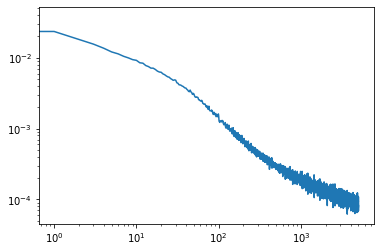

In [0]:
pl.plot(np.array(history.history['loss']))
pl.yscale('log')
pl.xscale('log')


In [0]:
model.load_weights("imgreconstruct_5000.h5")

# predict

In [0]:
outim = model.predict(X_te)
outim

array([[0.20787124, 0.20809476, 0.19665912, ..., 0.07271737, 0.05896452,
        0.04942913],
       [0.30371737, 0.29555684, 0.2906074 , ..., 0.28192613, 0.28134766,
        0.254261  ],
       [0.24153541, 0.23905331, 0.23665202, ..., 0.15638714, 0.15601844,
        0.15981483],
       ...,
       [0.2199488 , 0.22953372, 0.2285008 , ..., 0.05629057, 0.0837926 ,
        0.10642752],
       [0.37261477, 0.34718144, 0.33852673, ..., 0.21394323, 0.1898475 ,
        0.19616224],
       [0.31691298, 0.30277193, 0.3018374 , ..., 0.03488812, 0.04075715,
        0.03673625]], dtype=float32)

In [0]:
def compareinout(i, outim, X_tr):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(131) 
  ax.imshow(X_te[i].reshape(imgs[i].shape[:2]) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(132) 
  ax.imshow(outim[i].reshape(imgs_orig[i].shape[:2]) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(133) 
  ax.imshow(y_te[i].reshape(imgs_orig[i].shape[:2]) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


108
195
175
167
331
97
232
216
202
121


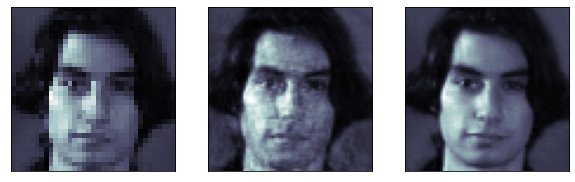

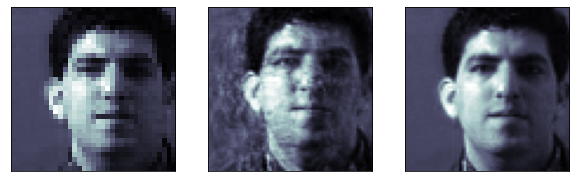

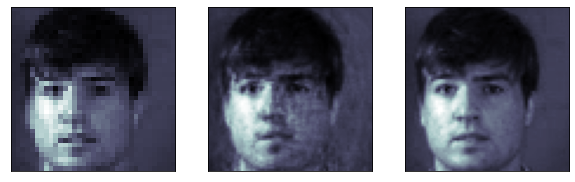

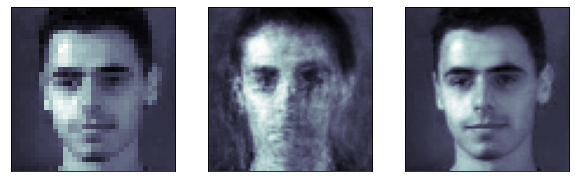

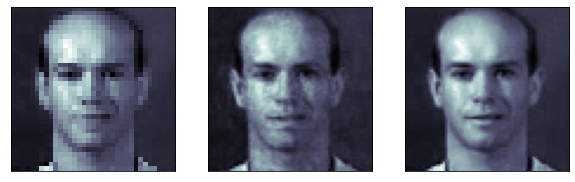

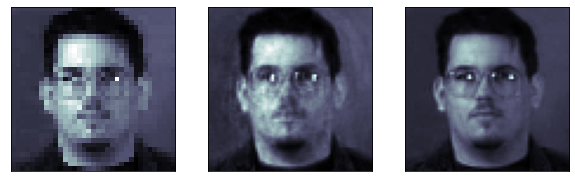

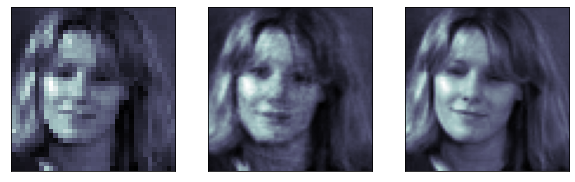

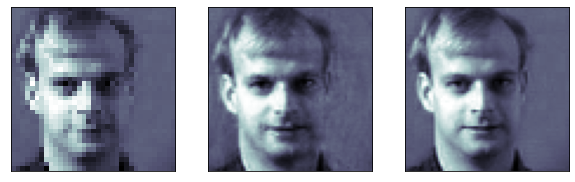

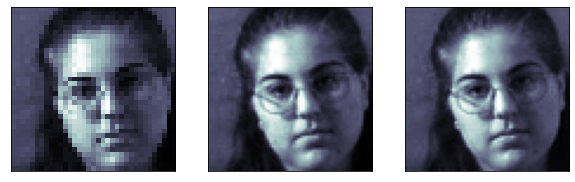

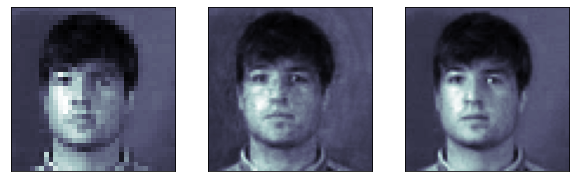

In [0]:
for i in range(10):
  j = np.random.randint(0, len(X_te))
  print(j)
  compareinout(j, outim, X_te)

317
126
340
232
288
100
300
54
279
57


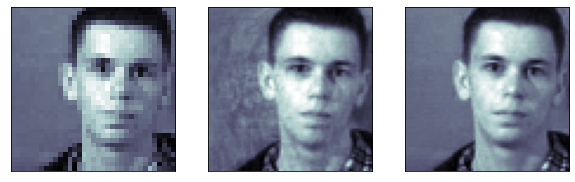

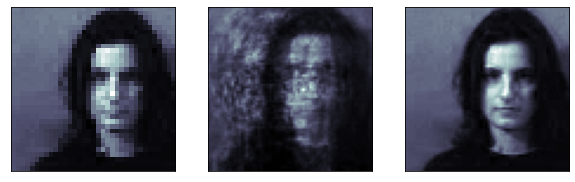

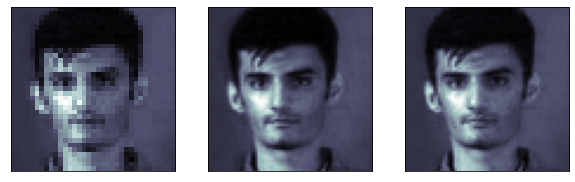

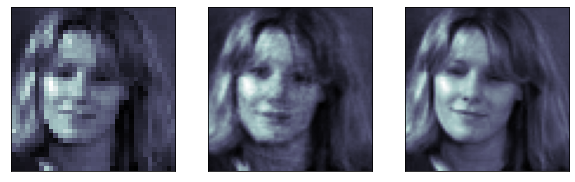

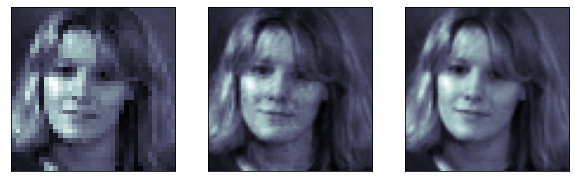

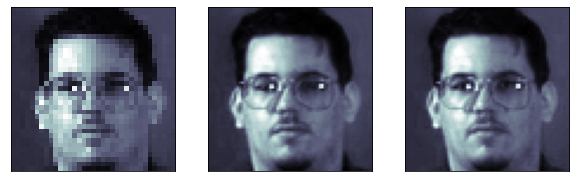

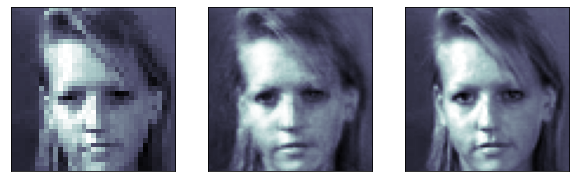

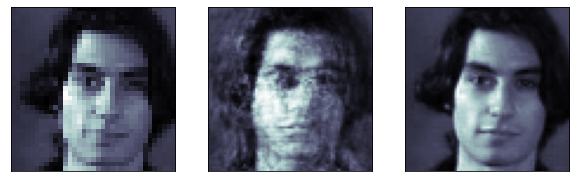

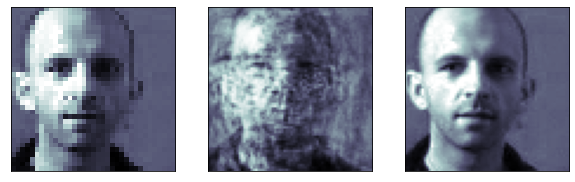

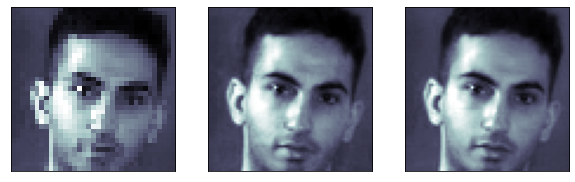

In [0]:
for i in range(10):
  j = np.random.randint(0, len(X_te))
  print(j)
  compareinout(j, outim, X_te)

Text(0.5, 1.0, 'latent representation of the test data')

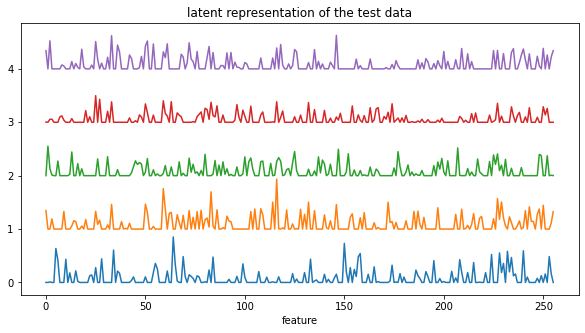

In [0]:
from keras import backend as K
# input placeholder
inp = model.input                   
# extract the bottle neck outputs
outputs = model.layers[2].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(X_te[:5])
  
for i in range(5):
  pl.plot(layer_outs[0][i] + i)

pl.xlabel("feature")
pl.title("latent representation of the test data")

In [0]:
imme = Image.open("testimg.png")

((525, 525, 3), 2904)

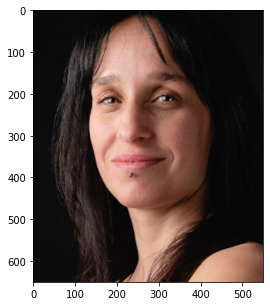

In [0]:

np_im = numpy.array(imme)[:,:,:3].astype(float) / 255
pl.figure()
pl.imshow(np_im[50:700,250:800,:] )
np_im[100:625,250:775,:].shape, np.prod(np_im.shape[1:])

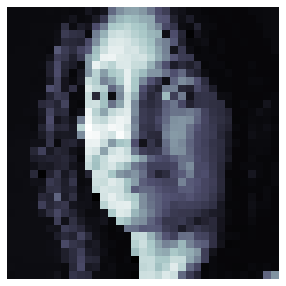

In [0]:
np_im_me = np_im[100:625,250:775,:][::15,::15,1]
pl.imshow(np_im_me, cmap="bone")
pl.axis('off');

In [0]:
pl.imshow(model.predict(np.array([np_im_me.flatten()])).reshape(70,70), cmap="bone")
pl.axis('off');

In [0]:
model2 = create_model()    


In [0]:
history2 = model2.fit(X_tr, y_tr, epochs=100000, batch_size=16, verbose=1)
model2.save("imgreconstruct_100000.h5")

Streaming output truncated to the last 5000 lines.
Epoch 4536/100000
1080/1080 [==============================] - 0s 319us/step - loss: 4.8787e-05 - mae: 0.0051 - acc: 0.5167
Epoch 4537/100000
1080/1080 [==============================] - 0s 316us/step - loss: 4.7493e-05 - mae: 0.0050 - acc: 0.5287
Epoch 4538/100000
1080/1080 [==============================] - 0s 327us/step - loss: 5.9534e-05 - mae: 0.0056 - acc: 0.5287
Epoch 4539/100000
1080/1080 [==============================] - 0s 317us/step - loss: 5.5534e-05 - mae: 0.0054 - acc: 0.5278
Epoch 4540/100000
1080/1080 [==============================] - 0s 319us/step - loss: 5.1648e-05 - mae: 0.0052 - acc: 0.5259
Epoch 4541/100000
1080/1080 [==============================] - 0s 318us/step - loss: 5.5063e-05 - mae: 0.0054 - acc: 0.5176
Epoch 4542/100000
1080/1080 [==============================] - 0s 318us/step - loss: 5.7000e-05 - mae: 0.0055 - acc: 0.5333
Epoch 4543/100000
1080/1080 [==============================] - 0s 313us/step - lo

In [0]:
pl.plot(np.array(history2.history['loss']))
pl.yscale('log')
pl.xscale('log')

In [0]:
model2.load_weights("imgreconstruct_10000.h5")

In [0]:
outim2 = model2.predict(X_te)
outim2

array([[0.23803374, 0.23000248, 0.23300679, ..., 0.14008921, 0.11853018,
        0.09816671],
       [0.3002342 , 0.30895782, 0.303142  , ..., 0.24793752, 0.24314575,
        0.25033206],
       [0.2301081 , 0.22888006, 0.23590074, ..., 0.15398994, 0.15222266,
        0.15035799],
       ...,
       [0.19341283, 0.20078753, 0.20730159, ..., 0.02736583, 0.0382728 ,
        0.06948686],
       [0.37431008, 0.36125183, 0.35353532, ..., 0.23280129, 0.22780858,
        0.24385823],
       [0.2894088 , 0.29232332, 0.29830796, ..., 0.03155714, 0.03212667,
        0.03183758]], dtype=float32)

3
152
4
87
320
186
357
29
262
335


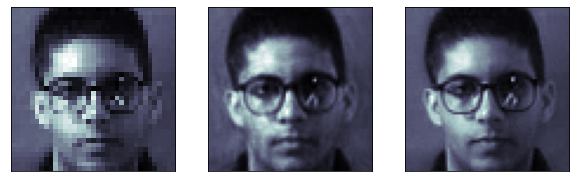

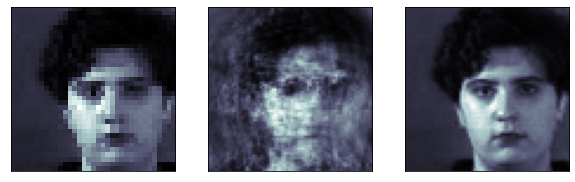

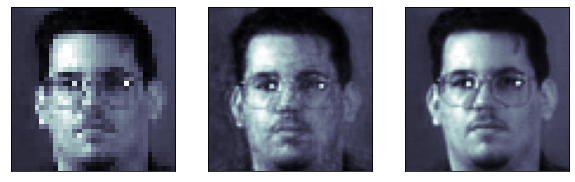

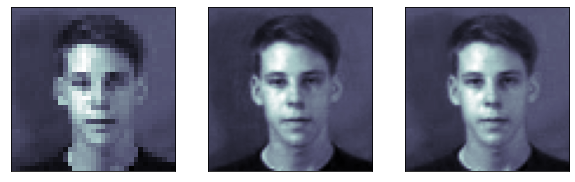

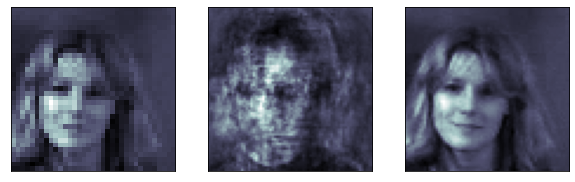

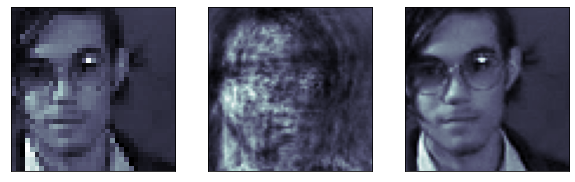

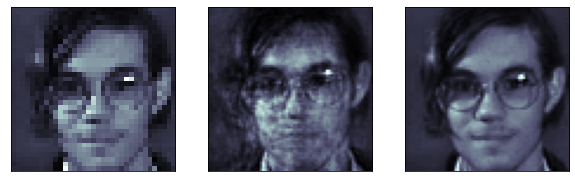

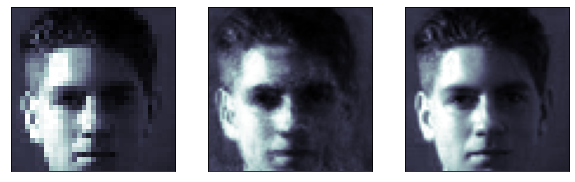

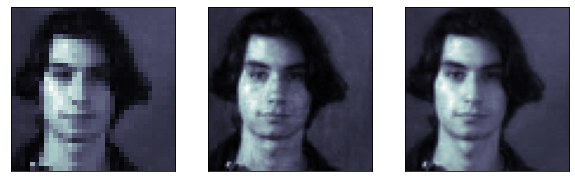

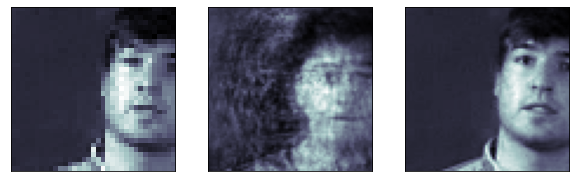

In [0]:
for i in range(10):
  j = np.random.randint(0, len(X_te))
  print(j)
  compareinout(j, outim2, X_te)
